<a href="https://colab.research.google.com/github/archiegilbie/ACCF5002-Data-Analysis-Report-Code---Archie-Gilbert-3-/blob/main/Report_due_13_01_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filtering the dataset

In [31]:
import pandas as pd

df = pd.read_csv("loans_dataset.csv")

In [32]:
n_before = df.shape[0]
print("Rows before cleaning:", n_before)

Rows before cleaning: 10000


Filtering the dataset

In [33]:
import numpy as np

cols_to_keep = [
    "interest_rate",
    "debt_to_income",
    "credit_util",
    "bankruptcy_dummy",
    "annual_income",
    "loan_amount",
    "term",
    "grade",
    "emp_length",
    "homeownership",
    "loan_purpose",
    "inquiries_last_12m"
]

# Create derived variables before filtering
# At the end of part C I messed up and had to run this to fix my code, It wasn't finding three collums
df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

df_filtered = df[cols_to_keep]

In [34]:
n_after = df.shape[0]
print("Rows after cleaning:", n_after)

Rows after cleaning: 10000


Renaming  variable inquiries_last_12m to credit_checks

In [35]:
df_filtered = df_filtered.rename(columns={'inquiries_last_12m': 'credit_checks'})

In [36]:
# To check that the variable inquiries_last_12m has been renamed to credit_checks
print("credit_checks" in df_filtered.columns)          # should be True
print("inquiries_last_12m" in df_filtered.columns)     # should be False

True
False


Creating a Summary Statistics Table

In [37]:
summary_stats = df_filtered.describe(include="all")
print(summary_stats)

        interest_rate  debt_to_income   credit_util  bankruptcy_dummy  \
count    10000.000000     9976.000000  10000.000000      10000.000000   
unique            NaN             NaN           NaN               NaN   
top               NaN             NaN           NaN               NaN   
freq              NaN             NaN           NaN               NaN   
mean        12.427524       19.308192      0.403077          0.121500   
std          5.001105       15.004851      0.269346          0.326724   
min          5.310000        0.000000      0.000000          0.000000   
25%          9.430000       11.057500      0.169002          0.000000   
50%         11.980000       17.570000      0.360163          0.000000   
75%         15.050000       25.002500      0.607295          0.000000   
max         30.940000      469.090000      1.835280          1.000000   

        annual_income   loan_amount          term  grade   emp_length  \
count    1.000000e+04  10000.000000  10000.000000 

In [38]:
summary_stats.to_csv("summary_stats.csv")

Counted unique values for the variables grade, verified_income, homeownership

In [39]:
# Number of unique categories
n_grade = df["grade"].nunique()
n_verified_income = df["verified_income"].nunique()
n_homeownership = df["homeownership"].nunique()

print("Unique grades:", n_grade)
print("Unique verified_income values:", n_verified_income)
print("Unique homeownership values:", n_homeownership)

Unique grades: 7
Unique verified_income values: 3
Unique homeownership values: 3


Counted frequencies for the variables grade, verified_income, homeownership

In [40]:
#grade
grade_freq = df["grade"].value_counts(normalize=True)

#verified_income
verified_income_freq = df["verified_income"].value_counts(normalize=True)

#homeownership
homeownership_freq = df["homeownership"].value_counts(normalize=True)

Printing them as Percentages

In [41]:
print("Grade (percentages):")
print((df["grade"].value_counts(normalize=True) * 100).round(2))

print("\nVerified income (percentages):")
print((df["verified_income"].value_counts(normalize=True) * 100).round(2))

print("\nHomeownership (percentages):")
print((df["homeownership"].value_counts(normalize=True) * 100).round(2))



Grade (percentages):
grade
B    30.37
C    26.53
A    24.59
D    14.46
E     3.35
F     0.58
G     0.12
Name: proportion, dtype: float64

Verified income (percentages):
verified_income
Source Verified    41.16
Not Verified       35.94
Verified           22.90
Name: proportion, dtype: float64

Homeownership (percentages):
homeownership
MORTGAGE    47.89
RENT        38.58
OWN         13.53
Name: proportion, dtype: float64


B.2 Visualisations

a. Histograms

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("loans_dataset.csv")

plt.style.use("seaborn-v0_8")


Histogram for Interest Rate

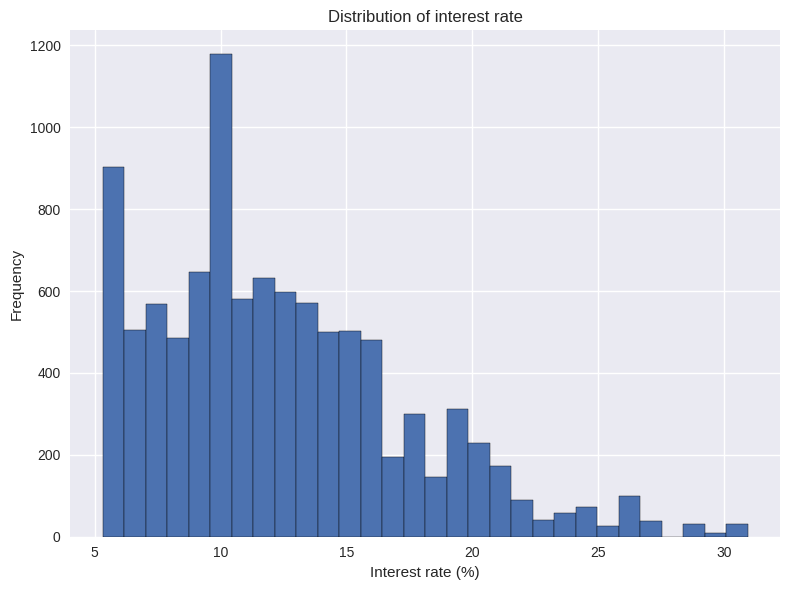

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(df["interest_rate"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Interest rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of interest rate")
plt.tight_layout()
plt.show()

Histogram for Annual Income

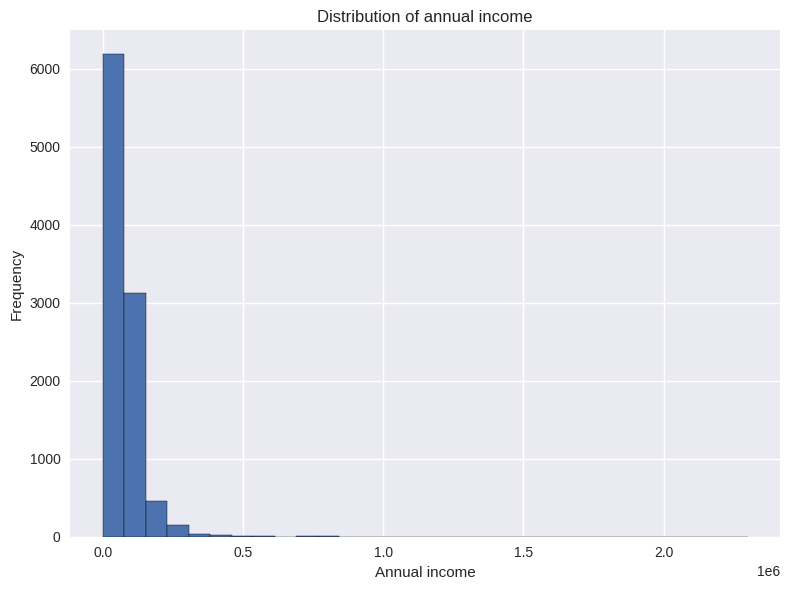

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(df["annual_income"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Annual income")
plt.ylabel("Frequency")
plt.title("Distribution of annual income")
plt.tight_layout()
plt.show()

b. Scatterplots

interest_rate vs annual_income

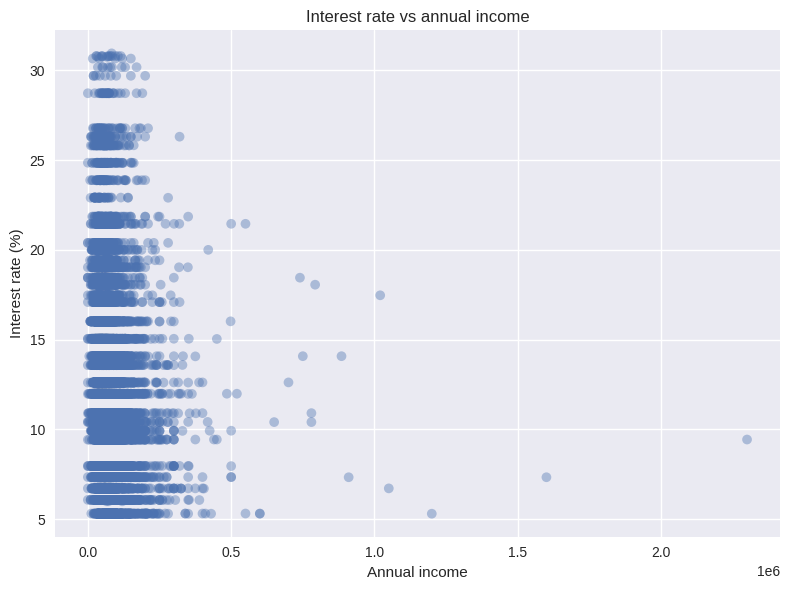

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["annual_income"],
    df["interest_rate"],
    alpha=0.4,
    edgecolor="none"
)

plt.xlabel("Annual income")
plt.ylabel("Interest rate (%)")
plt.title("Interest rate vs annual income")
plt.tight_layout()
plt.show()

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


interest_rate vs debt_to_income

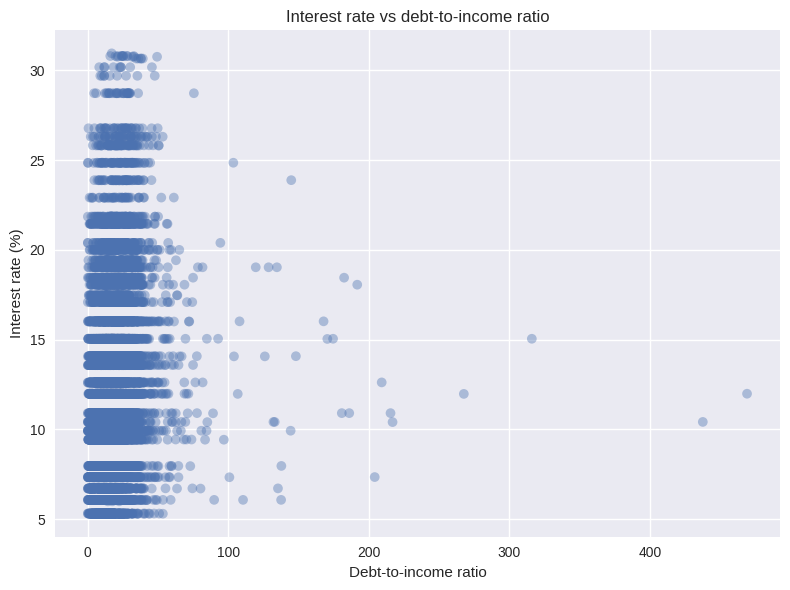

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["debt_to_income"],
    df["interest_rate"],
    alpha=0.4,
    edgecolors="none"
)
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Interest rate (%)")
plt.title("Interest rate vs debt-to-income ratio")
plt.tight_layout()
plt.show()

c. Boxplots

interest_rate by grade

<Figure size 800x600 with 0 Axes>

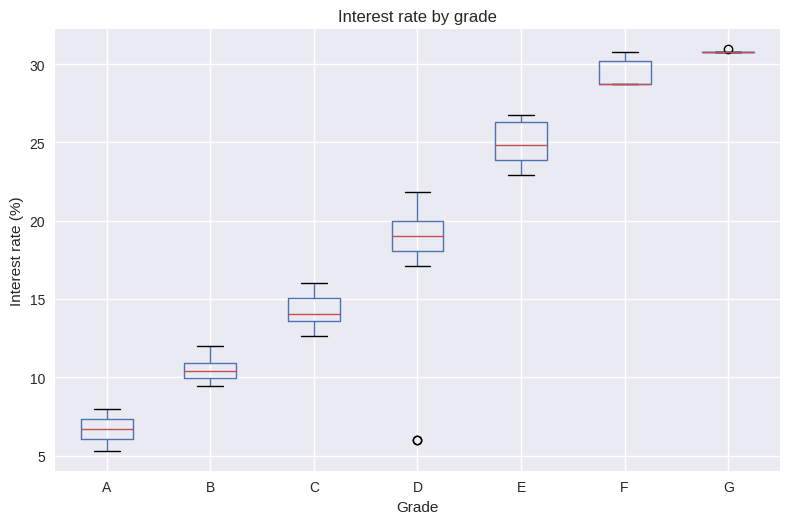

In [48]:
plt.style.use("seaborn-v0_8")

plt.figure(figsize=(8, 6))
df.boxplot(column="interest_rate", by="grade")

plt.xlabel("Grade")
plt.ylabel("Interest rate (%)")
plt.title("Interest rate by grade")
plt.suptitle("")
plt.tight_layout()
plt.show()

interest_rate by verified_income

<Figure size 800x600 with 0 Axes>

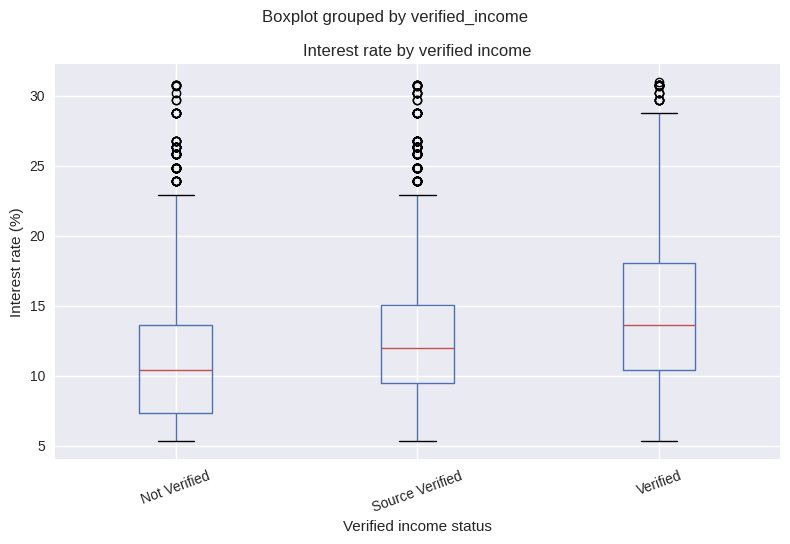

In [49]:
plt.style.use("seaborn-v0_8")

plt.figure(figsize=(8, 6))
df.boxplot(column="interest_rate", by="verified_income")

plt.xlabel("Verified income status")
plt.ylabel("Interest rate (%)")
plt.title("Interest rate by verified income")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

interest_rate by homeownership

<Figure size 800x600 with 0 Axes>

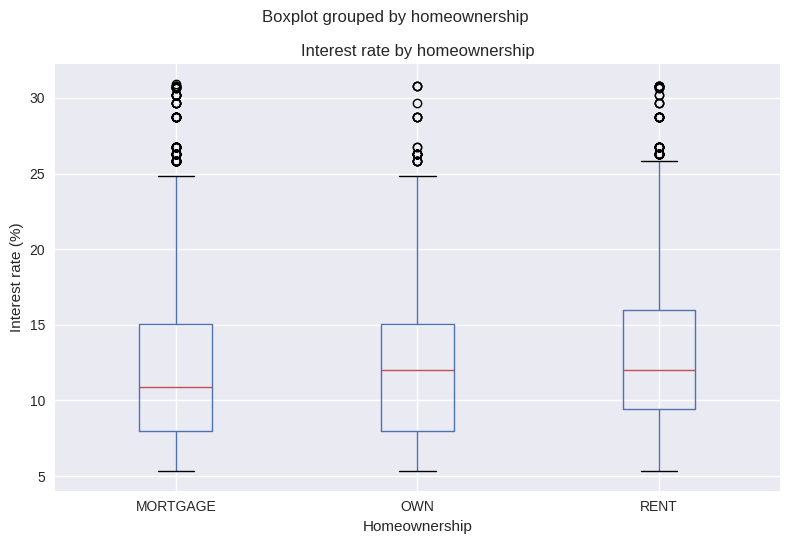

In [50]:
plt.style.use("seaborn-v0_8")

plt.figure(figsize=(8, 6))
df.boxplot(column="interest_rate", by="homeownership")

plt.xlabel("Homeownership")
plt.ylabel("Interest rate (%)")
plt.title("Interest rate by homeownership")
plt.tight_layout()
plt.show()

B.3 Derived Variables

In [51]:
#a
import pandas as pd
import numpy as np

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

In [52]:
# Mean of credit_util
mean_credit_util = df["credit_util"].mean()
print("Mean credit utilization:", mean_credit_util)

# Proportion of non‑zero values
prop_nonzero = (df["credit_util"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

Mean credit utilization: 0.40307696513838126
Proportion non‑zero: 0.9972


In [53]:
#b
import pandas as pd

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

In [54]:
# Mean of bankruptcy_dummy
mean_bankruptcy = df["bankruptcy_dummy"].mean()
print("Mean (proportion with prior bankruptcy):", mean_bankruptcy)

# Proportion non‑zero values:
prop_nonzero = (df["bankruptcy_dummy"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

Mean (proportion with prior bankruptcy): 0.1215
Proportion non‑zero: 0.1215


Part C: Regression Analysis

Model 1: Simple Linear Regression

In [55]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("loans_dataset.csv")

#fit the model
data = df[["interest_rate", "debt_to_income"]].dropna()

y = data["interest_rate"]
X = data["debt_to_income"]

X = sm.add_constant(X)

model1 = sm.OLS(y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        18:02:27   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5114      0.081    142.

In [56]:
#Report the estimated equation
beta0 = model1.params["const"]
beta1 = model1.params["debt_to_income"]

print(f"Estimated equation: interest_rate = {beta0:.3f} + {beta1:.3f} * debt_to_income")

Estimated equation: interest_rate = 11.511 + 0.047 * debt_to_income


In [57]:
#Test H0: β1 = 0 at α = 0.01, 0.05, 0.10
pval = model.pvalues["debt_to_income"]
print("p-value for beta1:", pval)

for alpha in [0.01, 0.05, 0.10]:
    decision = "reject H0" if pval < alpha else "do not reject H0"
    print(f"At alpha = {alpha}: {decision}")

p-value for beta1: 2.85559938331942e-08
At alpha = 0.01: reject H0
At alpha = 0.05: reject H0
At alpha = 0.1: reject H0


Model 2: Simple Linear Regression

In [58]:
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)
data = df[["interest_rate", "bankruptcy_dummy"]].dropna()

y = data["interest_rate"]
X = data["bankruptcy_dummy"]
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.47e-06
Time:                        18:02:27   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.3380      0.053  

In [59]:
#o test H0:β1=0 at α = 0.01, 0.05, 0.10
pval = model2.pvalues["bankruptcy_dummy"]
for alpha in [0.01, 0.05, 0.10]:
    decision = "reject H0" if pval < alpha else "do not reject H0"
    print(f"At alpha = {alpha}: {decision}")

At alpha = 0.01: reject H0
At alpha = 0.05: reject H0
At alpha = 0.1: reject H0


Model 3: Categorical Variable Regression

In [60]:
import pandas as pd

df = pd.read_csv("loans_dataset.csv")

print(df["verified_income"].value_counts())
print(df[["interest_rate", "verified_income"]].head())

verified_income
Source Verified    4116
Not Verified       3594
Verified           2290
Name: count, dtype: int64
   interest_rate  verified_income
0          14.07         Verified
1          12.61     Not Verified
2          17.09  Source Verified
3           6.72     Not Verified
4          14.07         Verified


Create dummy variables for verified_income

In [61]:
dummies = pd.get_dummies(df["verified_income"],
                         prefix="vi",
                         drop_first=True)

df = pd.concat([df, dummies], axis=1)

Estimate the regression in Python

In [62]:
df["vi_Source Verified"] = pd.to_numeric(df["vi_Source Verified"], errors="coerce")
df["vi_Verified"] = pd.to_numeric(df["vi_Verified"], errors="coerce")

In [63]:
import statsmodels.api as sm

y = df["interest_rate"].astype(float)
X = df[["vi_Source Verified", "vi_Verified"]].astype(float)
X = sm.add_constant(X)

model3 = sm.OLS(y, X, missing="drop").fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        18:02:28   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.0995      0

Compute average interest rate for “both unverified”

In [64]:
mask_unverified_both = (
    (df["verified_income"] == "Not Verified") &
    (df["verification_income_joint"] == "Not Verified")
)

avg_ir_both_unverified = df.loc[mask_unverified_both, "interest_rate"].mean()
print("Average interest rate (both unverified):", avg_ir_both_unverified)

Average interest rate (both unverified): 12.776005221932117


Model 4: Multiple Regression

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("loans_dataset.csv")

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

cols = ["interest_rate", "debt_to_income", "credit_util", "bankruptcy_dummy"]
data = df[cols].dropna()

y = data["interest_rate"]
X = data[["debt_to_income", "credit_util", "bankruptcy_dummy"]]

X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.85e-174
Time:                        18:02:28   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8708      0.102  

Results presented in a formatted table

In [66]:
summary_table = pd.DataFrame({
    'Variable': ['Intercept', 'debt_to_income', 'credit_util', 'bankruptcy_dummy'],
    'Coefficient': model4.params.values,
    'Std. Error': model4.bse.values,
    't-Statistic': model4.tvalues.values,
    'p-Value': model4.pvalues.values
}).round(4)

print(summary_table)
print(f"\nR² = {model4.rsquared:.4f}")
print(f"Adjusted R² = {model4.rsquared_adj:.4f}")


           Variable  Coefficient  Std. Error  t-Statistic  p-Value
0         Intercept       9.8708      0.1024      96.4271   0.0000
1    debt_to_income       0.0365      0.0032      11.2821   0.0000
2       credit_util       4.4113      0.1802      24.4796   0.0000
3  bankruptcy_dummy       0.5725      0.1472       3.8898   0.0001

R² = 0.0777
Adjusted R² = 0.0774


Model 5: Enhanced Multiple Regression

In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("loans_dataset.csv")

df = df.rename(columns={'inquiries_last_12m': 'credit_checks'})

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

df["term_60"] = (df["term"] == 60).astype(int)

cat_vars = ["grade", "emp_length", "homeownership", "loan_purpose", "credit_checks"]
dummies = pd.get_dummies(df[cat_vars], drop_first=True)

X = pd.concat([
    df[["debt_to_income", "credit_util", "bankruptcy_dummy",
        "annual_income", "loan_amount", "term_60"]],
    dummies
], axis=1)

data = pd.concat([df["interest_rate"], X], axis=1).dropna()
y = data["interest_rate"]
X = data.drop(columns="interest_rate")
X = sm.add_constant(X)

In [68]:
print("y shape:", y.shape)
print("X shape:", X.shape)
print("y index head:", y.index[:5])
print("X index head:", X.index[:5])

y shape: (9182,)
X shape: (9182, 28)
y index head: Index([0, 1, 2, 3, 4], dtype='int64')
X index head: Index([0, 1, 2, 3, 4], dtype='int64')


In [69]:
X_numeric = X.select_dtypes(include=["number"]).copy()

all_vars = pd.concat([y, X_numeric], axis=1).dropna()

y_clean = all_vars.iloc[:, 0]
X_clean = all_vars.iloc[:, 1:]
X_clean = sm.add_constant(X_clean)

model5 = sm.OLS(y_clean, X_clean).fit()
print(model5.summary())

# Residuals for first five observations used in the regression
residuals_first5 = model5.resid.iloc[:5]
print(residuals_first5)

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     363.6
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:02:28   Log-Likelihood:                -26550.
No. Observations:                9182   AIC:                         5.312e+04
Df Residuals:                    9173   BIC:                         5.318e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.8466      0.157  

Part E:Research Question, Hypotheses, and Independent Analysis

In [70]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv("loans_dataset.csv")

df = df.dropna(subset=["interest_rate","verified_income","debt_to_income",
                       "loan_amount","loan_purpose","term"])

model = smf.ols(
    "interest_rate ~ C(verified_income) + debt_to_income + delinq_2y + "
    "inquiries_last_12m + account_never_delinq_percent + public_record_bankrupt + "
    "loan_amount + C(term) + C(loan_purpose)",
    data=df
).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:02:29   Log-Likelihood:                -28853.
No. Observations:                9976   AIC:                         5.775e+04
Df Residuals:                    9955   BIC:                         5.790e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------